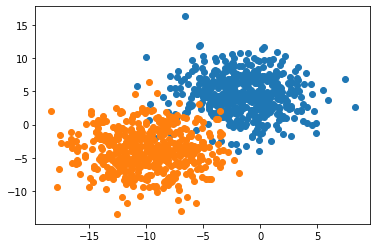

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tensorflow import keras
from tensorflow.keras import callbacks, layers

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# create scatter plot for samples from each class (simple example)
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = np.where(y == class_value)
 # create scatter of these samples
 plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [2]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

def train_sample_model(af='relu'):
    # define the model
    # fit a fully-connected network (ie, a multi-layer perceptron)
    model = keras.Sequential([
      layers.Dense(32, activation=af),
      layers.Dense(32, activation=af),
      layers.Dense(32, activation=af),
      layers.Dense(1)
    ])
    model.compile(
      loss='mse',
      optimizer='adam',
    )
    history = model.fit(
      X, y,
      epochs=15,
      verbose=1,
    )

    # make predictions for the grid
    yhat = model.predict(grid)
    return yhat

def plot_decision_surface(x, y, predictions, af='relu'):
    z = predictions.reshape(x.shape)

    fig = plt.figure(figsize=(5,5))
    ax = plt.axes(projection='3d')
    fig.patch.set_facecolor('xkcd:white')
    
    c = ax.plot_surface(x, y, z, 
                        cmap='rainbow', 
                        rstride=1, 
                        cstride=1, 
                        alpha=None, 
                        antialiased=True)
#     plt.colorbar(c)
#     ax.set_title(af) # title as the activation function used 
    plt.tight_layout()
    plt.savefig('images/decision-surfaces/'+af+'-decision-surface.png', dpi=600)
    plt.show()

## ReLU

Epoch 1/15
32/32 [==============================] - 1s 8ms/step - loss: 0.0970
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0427
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0409
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0392
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0359
Epoch 8/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0344
Epoch 9/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0323
Epoch 10/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0308
Epoch 11/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 12/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0280
Epoch 13/15
32/32 [==============================

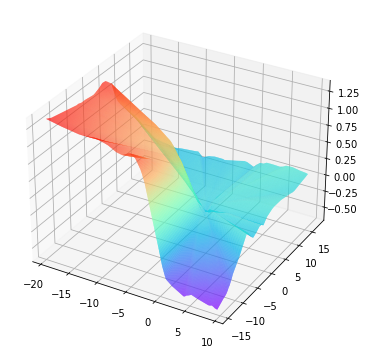

In [3]:
plot_decision_surface(xx, yy, train_sample_model(af='relu'), 'ReLU')

## Swish

Epoch 1/15
32/32 [==============================] - 1s 9ms/step - loss: 0.0647
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0279
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0236
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 8/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0226
Epoch 9/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0224
Epoch 10/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0221
Epoch 11/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0222
Epoch 12/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 13/15
32/32 [==============================

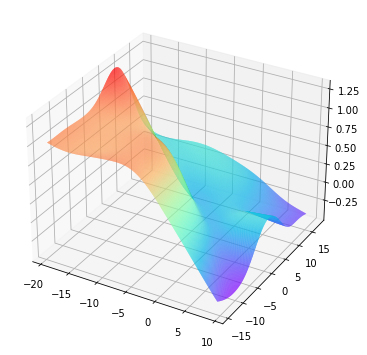

In [4]:
plot_decision_surface(xx, yy, train_sample_model(af='swish'), 'Swish')

## Tanh

Epoch 1/15
32/32 [==============================] - 1s 7ms/step - loss: 0.0916
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0438
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0353
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0315
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0282
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0259
Epoch 8/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0251
Epoch 9/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0262
Epoch 10/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 11/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 12/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 13/15
32/32 [==============================

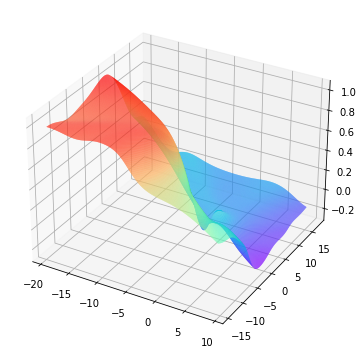

In [5]:
plot_decision_surface(xx, yy, train_sample_model(af='tanh'), 'Tanh')

## Sigmoid

Epoch 1/15
32/32 [==============================] - 1s 7ms/step - loss: 0.2470
Epoch 2/15
32/32 [==============================] - 0s 6ms/step - loss: 0.1591
Epoch 3/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0825
Epoch 4/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0401
Epoch 5/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0352
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0346
Epoch 7/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0341
Epoch 8/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0329
Epoch 9/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0322
Epoch 10/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 11/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0313
Epoch 12/15
32/32 [==============================] - 0s 6ms/step - loss: 0.0310
Epoch 13/15
32/32 [==============================

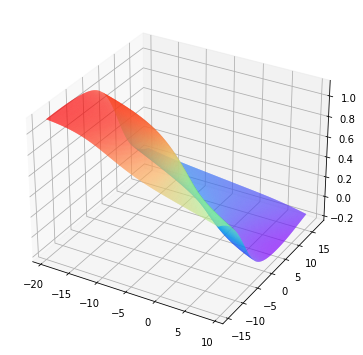

In [6]:
plot_decision_surface(xx, yy, train_sample_model(af='sigmoid'), 'Sigmoid')

## GenGamma

In [7]:
import tensorflow as tf
from scipy.special import gamma # for gamma func stuff

'''
HYPERPARAMETERS
'''

a = 1 # alpha
c = 3 # gamma
mu = -2.6  # mu location parameter
b = 3 # beta
sf = 1.17 # scale factor

'''
FUNCTIONS
'''
def generalized_gamma(x):
    x = tf.math.divide(x-mu, b)
    func = tf.math.divide(tf.math.exp(-x**c)*c*x**((c*a)-1), gamma(a))    
    return tf.where(x>0, tf.math.divide(func, sf), 0)

def gamma_derivative(x): # i changed this to be compatiable that might b why it doesnt graph correctly
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = generalized_gamma(x)
    dy_dx = tape.gradient(y, x)
    return dy_dx

'''
Activation function definition 
'''
@tf.custom_gradient
def gamma_activation(x):
    def grad(dy):
        return gamma_derivative(x) * dy

    result = generalized_gamma(x)
    return result, grad

Epoch 1/15
32/32 [==============================] - 1s 15ms/step - loss: 0.3004
Epoch 2/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0808
Epoch 3/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 4/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0370
Epoch 5/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 6/15
32/32 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 7/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 8/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 9/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0291
Epoch 10/15
32/32 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 11/15
32/32 [==============================] - 0s 10ms/step - loss: 0.0285
Epoch 12/15
32/32 [==============================] - 0s 10ms/step - loss: 0.0269
Epoch 13/15
32/32 [==========================

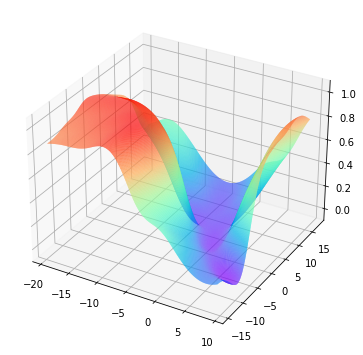

In [8]:
plot_decision_surface(xx, yy, train_sample_model(af=gamma_activation), 'Generalized Gamma')

## Tent

In [9]:
'''
FUNCTIONS
'''
tent_delta = 1

def tent(x):
    return tf.math.maximum(0.00, tent_delta-tf.math.abs(x))

def tent_derivative(x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = tent(x)
    dy_dx = tape.gradient(y, x)
    return dy_dx

'''
Activation function definition 
'''
@tf.custom_gradient
def tent_activation(x):
    def grad(dy):
        return tent_derivative(x) * dy

    result = tent(x)
    return result, grad

Epoch 1/15
32/32 [==============================] - 1s 11ms/step - loss: 0.3227
Epoch 2/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0580
Epoch 3/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0398
Epoch 4/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 5/15
32/32 [==============================] - 0s 8ms/step - loss: 0.0321
Epoch 6/15
32/32 [==============================] - 0s 8ms/step - loss: 0.0307
Epoch 7/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0282
Epoch 8/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0272
Epoch 9/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0261
Epoch 10/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 11/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 12/15
32/32 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 13/15
32/32 [=============================

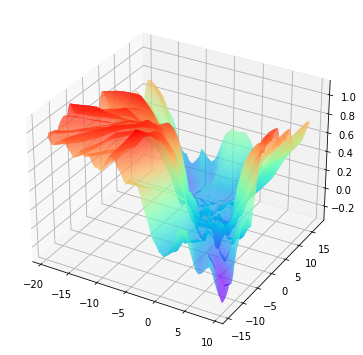

In [10]:
plot_decision_surface(xx, yy, train_sample_model(af=tent_activation), 'Tent')